In [191]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

#marketing_campaign


In [192]:
df=pd.read_csv( "marketing_campaign.csv" ,sep='\t' ) 
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [193]:
df.shape

(2240, 29)

## encoding

In [194]:
one_hot = pd.get_dummies(df['Education'])
# Drop column B as it is now encoded
df = df.drop('Education',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [195]:
one_hot = pd.get_dummies(df['Marital_Status'])
# Drop column B as it is now encoded
df = df.drop('Marital_Status',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [196]:
df.drop([ 'Dt_Customer','ID'],axis=1,inplace=True)

## nulls

(array([1.654e+03, 5.540e+02, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1730. ,  68223.6, 134717.2, 201210.8, 267704.4, 334198. ,
        400691.6, 467185.2, 533678.8, 600172.4, 666666. ]),
 <BarContainer object of 10 artists>)

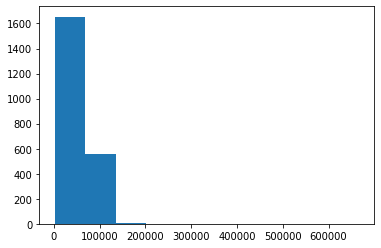

In [197]:
plt.hist(df['Income'])

In [198]:
df['Income'].fillna(df['Income'].median(),inplace=True)

## scaling

In [199]:
# standard scalar
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df=scaler.fit_transform(df)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=scaler.fit_transform(df)

In [200]:
df.shape

(2240, 38)

## PCA 

In [201]:
from sklearn.decomposition import PCA
pca = PCA()
df_c=pca.fit_transform(df)
#pca.explained_variance_ratio_
#plt.plot(pca.explained_variance_ratio_.cumsum())

In [202]:
import plotly.express as px

fig = px.line( x=np.arange(1,39), y=pca.explained_variance_ratio_.cumsum(), title='')
fig.show()

In [203]:
pca = PCA(25)
d=pca.fit_transform(df)

# Kmeans

-------------------------------------------------------------------------------------------------
Kmeans :
elbow method


sillute score 


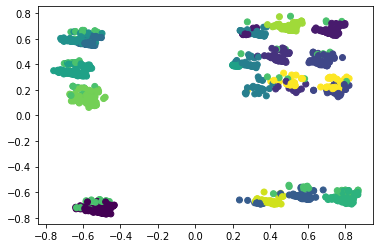

silhouette_score :  0.2653023335339176
number of clusters is :  15


In [204]:
#Kmeans
print("-------------------------------------------------------------------------------------------------"  )
print("Kmeans :"  )

c=[]
iner=[]
sil=[]
for i in range(2,30):
    clustering = KMeans(n_clusters=i, random_state=0).fit(d)
    c.append(    i    )
    iner.append(    clustering.inertia_    )
    sil.append( silhouette_score(d ,clustering.predict(d) ) )
print('elbow method')    
fig = px.line( y=iner,x=c)
fig.show()
print('sillute score ')    
fig = px.line(y= sil,x=c)
fig.show()
    
clustering = KMeans(n_clusters=15, random_state=0).fit(d)
plt.scatter(d[:,0]  , d[:,1]   ,  c = clustering.labels_  ) 
plt.show()
print("silhouette_score : " ,silhouette_score(d,clustering.labels_))
print("number of clusters is : " , 15)

## apply to all clustering techniques

# agglomerative

sillute score 


-------------------------------------------------------------------------------------------------
agglomerative :


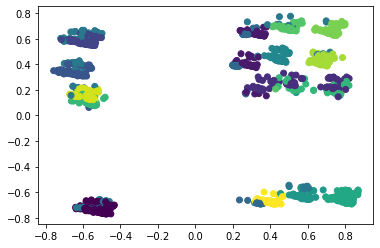

silhouette_score :  0.3025450052181823
number of clusters is :  16


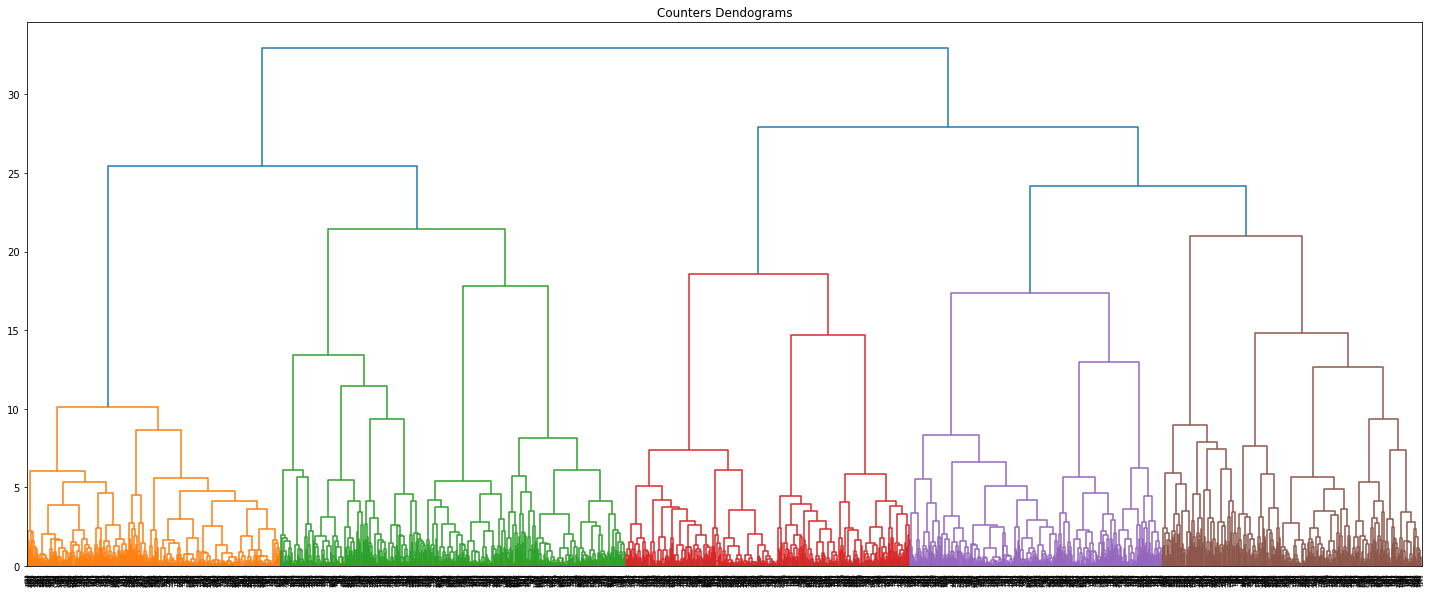

In [205]:
import scipy.cluster.hierarchy as shc


c=[]
sil=[]
for i in range(2,20):
    clustering = AgglomerativeClustering(i).fit(d)
    c.append(    i    )
    sil.append( silhouette_score(d , clustering.labels_ ) )

print('sillute score ')    
fig = px.line(x=c,y=sil)
fig.show()


print("-------------------------------------------------------------------------------------------------"  )
print("agglomerative :"  )
clustering = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='ward').fit(d)
plt.scatter(d[:,0] , d[:,1] ,  c = clustering.labels_  ) 
plt.show()
print("silhouette_score : " ,silhouette_score(d,clustering.labels_))
print("number of clusters is : " , 16)

plt.figure(figsize=(25, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=d , method='ward',metric='euclidean'),orientation='top') 

# guassian mixture

-------------------------------------------------------------------------------------------------
guassian mixture :


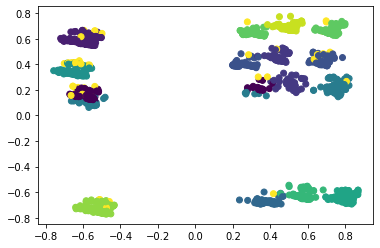

silhouette_score :  0.27722052679628534
number of clusters is :  13


In [206]:
#guassian mixture
print("-------------------------------------------------------------------------------------------------"  )
print("guassian mixture :"  )

dd=[]
inr=[]
for i in range(2,15):
    gm1 = GaussianMixture(n_components=i, random_state=0).fit(d)
    dd.append(    i    )
    inr.append(    silhouette_score( d , gm1.predict(d)    ))
    
            
fig =px.line(x=dd,y= inr)
fig.show()
    

gm = GaussianMixture(n_components=13, random_state=0).fit(d)
gm.predict(d)
plt.scatter(d[:,0]  , d[:,1]     ,  c = gm.predict(d)    ) 
plt.show()
print("silhouette_score : " ,silhouette_score(d,gm.predict(d) ))
print("number of clusters is : " , 13)

# Dbscan

In [207]:
len(distances)

2240

DBSCAN 


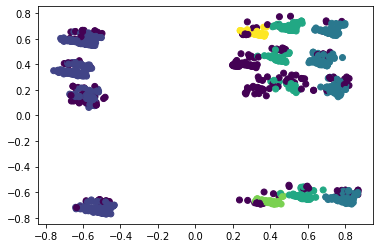

silhouette_score :  0.13572325059668736
number of clusters :  5
silhouette_score without noise(-1) :  0.1748528727567509


In [208]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(d)
distances, indices = neighbors_fit.kneighbors(d)
distances = np.sort(distances, axis=0)
distances = distances[:,39]
fig = px.line(y=distances,x=np.arange(2240))
fig.show()
#distances
# dbscan
print("DBSCAN "  )
clustering = DBSCAN(eps=1.4, min_samples=39).fit(d)
plt.scatter(d[:,0] , d[:,1] ,  c = clustering.labels_  ) 
plt.show()
print("silhouette_score : " ,silhouette_score(d,clustering.labels_) )
print("number of clusters : " ,  len(    np.unique(clustering.labels_[clustering.labels_!=-1] )     ) )
print("silhouette_score without noise(-1) : " ,silhouette_score(d[clustering.labels_!=-1] ,clustering.labels_[clustering.labels_!=-1]) )

-------------------------------------------------------------------------------------------------
Kmeans :
elbow method


sillute score 


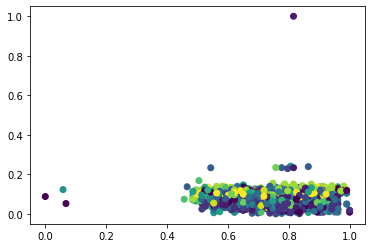

silhouette_score :  0.2473552701699134
number of clusters is :  15


In [209]:
#Kmeans
print("-------------------------------------------------------------------------------------------------"  )
print("Kmeans :"  )

c=[]
iner=[]
sil=[]
for i in range(2,30):
    clustering = KMeans(n_clusters=i, random_state=0).fit(df)
    c.append(    i    )
    iner.append(    clustering.inertia_    )
    sil.append( silhouette_score(d ,clustering.predict(df) ) )
print('elbow method')    
fig = px.line( y=iner,x=c)
fig.show()
print('sillute score ')    
fig = px.line(y= sil,x=c)
fig.show()
    
clustering = KMeans(n_clusters=15, random_state=0).fit(df)
plt.scatter(df[:,0]  , df[:,1]   ,  c = clustering.labels_  ) 
plt.show()
print("silhouette_score : " ,silhouette_score(df,clustering.labels_))
print("number of clusters is : " , 15)

In [210]:
df

array([[0.62135922, 0.08483222, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59223301, 0.06709518, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.69902913, 0.10509733, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.85436893, 0.08309221, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61165049, 0.10153609, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.59223301, 0.07690815, 0.5       , ..., 0.        , 0.        ,
        0.        ]])